# Auto-cropping

Notebook for experimenting with cropping algorithms

## Layers

In [6]:
%reload_ext autoreload

In [7]:
%autoreload 2

In [ ]:
from pathlib import Path
from nevernegative.layers.utils.resize import Resize
from nevernegative.scanner.simple import SimpleScanner
import matplotlib.pyplot as plt

In [2]:
images_folder = "/Users/louismanestar/Documents/Projects/Film Scanner/nevernegative/test_images/old_images/colorplus"
glob = "*.CR2"

### V1: Box-crop

In [3]:
from nevernegative.layers.balancing.invert import Invert
from nevernegative.layers.crop.box import BoxCrop

layers = [
    BoxCrop(threshold=0.25, fill_holes=True, padding=-0.02),
    Invert(),
]

### V2: Hough Crop

In [5]:
from nevernegative.layers.balancing.invert import Invert
from nevernegative.layers.crop.hough_2 import HoughCrop2

layers = [
    HoughCrop2(padding=0.05),
    Invert(),
]

### Testing Layers

#### Single Image

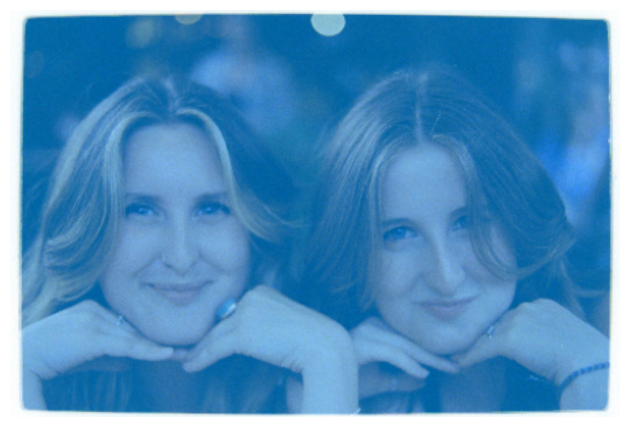

In [6]:
scanner = SimpleScanner([Resize(height=400), *layers], device="mps")

filename = "IMG_5111.CR2"
output_path = Path("results/cropping/")

processed = scanner.file(
    source=Path(images_folder) / filename,
    destination=Path("results/cropping/"),
    is_raw=True,
    plot_path=output_path
)

plt.imshow(processed.permute(1, 2, 0).cpu().numpy())
plt.axis("off")
plt.tight_layout()

In [ ]:
scanner = SimpleScanner(layers, device="mps")

scanner.glob(
    source=(Path(images_folder) / glob).as_posix(),
    destination=Path("test_images/sample"),
    is_raw=True,
)

Proccesing images: 100%|██████████| 12/12 [03:36<00:00, 18.05s/it]


: 